In [2]:
!pip install prophet

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import requests
import os
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
from statsmodels.tools.eval_measures import rmse

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import numpy as np

# # Assuming 'X' is your entire time series data

# # Define batch size and sequence length
# batch_size = 10000
# sequence_length = 100  # Adjust based on your data and problem

# # Reshape data into appropriate format for LSTM
# n_samples = len(X) // sequence_length
# X = X[:n_samples * sequence_length]  # Trim to a multiple of sequence length
# X = np.reshape(X, (n_samples, sequence_length, 1))

# # Initialize LSTM model with stateful=True
# model = Sequential()
# model.add(LSTM(units=50, batch_input_shape=(batch_size, sequence_length, 1), stateful=True))
# model.add(Dense(units=1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model on different batches
# num_batches = len(X) // batch_size
# count=0
# # Read the large dataset in chunks
# while count<10:
#     for chunk in pd.read_csv('labapp3-data-new.txt', delimiter=' ', na_values=['NaN', 'NAN', 'na', 'N/A'] , chunksize=chunk_size):
#         chunk.rename(columns={'time': 'ds', 'temperature': 'y'}, inplace=True)
#         chunk['ds'] = pd.to_datetime(chunk['ds'])

#         # Train the model on the current batch
#         model.train_on_batch(chunk[:, :-1], chunk[:, -1])

# # After training on all batches, you can use the model for predictions or further processing
# # For example, to predict the next values in the sequence:
# next_values = model.predict(some_sequence_data)  # 'some_sequence_data' should be in the same format as 'X'


In [11]:
# # Assuming 'your_large_dataset.csv' is your large dataset file
# chunk_size = 10000  # Define your desired chunk size

# # Initialize an empty Prophet model
# final_model = Prophet()

# count=0
# # Read the large dataset in chunks
# while count<10:
#     for chunk in pd.read_csv('labapp3-data-new.txt', delimiter=' ', na_values=['NaN', 'NAN', 'na', 'N/A'] , chunksize=chunk_size):
#         chunk.rename(columns={'time': 'ds', 'temperature': 'y'}, inplace=True)
#         chunk['ds'] = pd.to_datetime(chunk['ds'])
#         # Process each chunk
#         # df = chunk.loc[:, ['time', 'temperature']].copy()

#         # Assuming 'df' is your DataFrame and 'column_name' is the column containing DateTime objects
#         # first_row_datetime = df['time'].iloc[0]  # Get DateTime object from the first row

#         # Convert the DateTime object to a Pandas Timestamp
#         # timestamp = pd.Timestamp(first_row_datetime)

#         # Create a list of Timestamp objects incremented by 30 seconds
#         # timestamps_30_seconds = [timestamp + pd.Timedelta(seconds=30 * i) for i in range(0, len(df['time']))]  # Generates 10 timestamps (30 seconds apart)

#         # df['time']=timestamps_30_seconds
#         # df.rename(columns={"time": "ds", "temperature": "y"}, inplace=True)
#         # df
#         # Assuming 'ds' is your date/time column and 'y' is the target column for forecasting
#         # chunk.rename(columns={'your_date_column': 'ds', 'your_target_column': 'y'}, inplace=True)

#         # Initialize and fit Prophet model for each chunk
#         # model_chunk = Prophet()
#         # model_chunk.fit(chunk)
#         name="model"+str(count)
#         name = Prophet(**kwargs)
#         name.fit()
#         # p2 = Prophet(**kwargs)
#         final_model.fit(pd.concat([df, additional_week_of_daily_data_df]), init=p.params)
#         # Expand the final model with each chunk's model
#         # final_model = final_model + model_chunk
#         Prophet.
#         final_model = Prophet.merge(final_model, model_chunk)
#     count+=1

# # Now, 'final_model' contains the aggregated model trained on all chunks


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfnmuwmb/5p7___i2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfnmuwmb/2j3l5zvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81782', 'data', 'file=/tmp/tmpcfnmuwmb/5p7___i2.json', 'init=/tmp/tmpcfnmuwmb/2j3l5zvh.json', 'output', 'file=/tmp/tmpcfnmuwmb/prophet_modelttlq09e5/prophet_model-20231119210345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:03:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:03:48 - cmdstanpy - INFO - Chain

AttributeError: ignored

In [65]:
# Replace 'your_file.csv' with your actual file name and adjust 'delimiter' accordingly
df = pd.read_csv('labapp3-data-new.txt', delimiter=' ', na_values=['NaN', 'NAN', 'na', 'N/A'])
df.head()
# 0 NaN NaN NaN NaN NaN

,time,nodeid,temperature,humidity,light,voltage
0,30,19.0,19.7336,37.0933,71.76,2.69964
1,30,25.0,19.6160,37.5737,97.52,2.69964
2,30,24.0,19.7728,37.1620,143.52,2.71196
3,30,3.0,20.2040,36.8871,50.6,2.69964
4,30,28.0,19.0476,40.0945,NaN,2.80151


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313681 entries, 0 to 2313680
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   time         int64  
 1   nodeid       float64
 2   temperature  float64
 3   humidity     float64
 4   light        object 
 5   voltage      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 105.9+ MB


In [67]:
# Assuming 'data' is your DataFrame
# Check for NaN values in each column
has_null = df.isnull().any()

# Display columns with NaN values
columns_with_null = has_null[has_null].index.tolist()
print("Columns with NaN values:", columns_with_null)

# If you want to count the number of NaN values in each column:
num_null_values = df.isnull().sum()
print("Number of NaN values in each column:")
print(num_null_values)

Columns with NaN values: ['nodeid', 'temperature', 'humidity', 'light', 'voltage']
Number of NaN values in each column:
time               0
nodeid           525
temperature      900
humidity         901
light          93877
voltage          525
dtype: int64


In [17]:
# nan_count = df.isna().sum()
# nan_count

time               0
nodeid           525
temperature      900
humidity         901
light          93877
voltage          525
dtype: int64

In [68]:
# Create a Timestamp object with a specific date and time
# First measurement was taken at 2004-02-28 00:58:15.315133.
timestamp = pd.Timestamp(year=2004, month=2, day=28, hour=00, minute=58, second=15)
print(timestamp)


2004-02-28 00:58:15


In [69]:
df['time'][0] = timestamp
df['time'][0]

Timestamp('2004-02-28 00:58:15')

In [70]:
df.head()

,time,nodeid,temperature,humidity,light,voltage
0,2004-02-28 00:58:15,19.0,19.7336,37.0933,71.76,2.69964
1,30,25.0,19.6160,37.5737,97.52,2.69964
2,30,24.0,19.7728,37.1620,143.52,2.71196
3,30,3.0,20.2040,36.8871,50.6,2.69964
4,30,28.0,19.0476,40.0945,NaN,2.80151


In [73]:
# Assuming 'df' is your DataFrame and 'column_name' is the column containing DateTime objects
first_row_datetime = df['time'].iloc[0]  # Get DateTime object from the first row

# Convert the DateTime object to a Pandas Timestamp
timestamp = pd.Timestamp(first_row_datetime)

# Create a list of Timestamp objects incremented by 30 seconds
timestamps_30_seconds = [timestamp + pd.Timedelta(seconds=30 * i) for i in range(0, len(df['time']))]  # Generates timestamps (30 seconds apart)

df['time']=timestamps_30_seconds
# for index, value in df['time'].iloc[1:].iteritems():
    # next_timestamp = [previous_timestamp + pd.Timedelta(seconds=30)]  # Generates 10 timestamps (30 seconds apart)
    # value = next_timestamp
    # previous_timestamp = next_timestamp

In [74]:
df.head()
df.tail()

,time,nodeid,temperature,humidity,light,voltage
2313676,2006-05-11 09:36:15,56.0,23.4968,35.8530,0.04022,2.81479
2313677,2006-05-11 09:36:45,56.0,23.4968,35.8530,0.04022,2.81479
2313678,2006-05-11 09:37:15,56.0,23.4772,35.8530,0.04022,2.82819
2313679,2006-05-11 09:37:45,56.0,23.4968,35.8530,0.04022,2.81479
2313680,2006-05-11 09:38:15,56.0,23.5360,36.4396,37.72,2.80151


In [75]:
# Assuming 'df' is your original DataFrame containing the data

# Get unique node IDs from the 'nodeid' column
unique_nodes = df['nodeid'].unique()

# Create a dictionary of DataFrames for each node ID
node_dataframes = {}
for node_id in unique_nodes:
    node_dataframes[node_id] = df[df['nodeid'] == node_id].copy()

# Create a list of tuples sorted by keys
sorted_items = sorted(node_dataframes.items(), key=lambda x: x[0])
# Now node_dataframes is a dictionary where each key represents a node ID,
# and the corresponding value is a DataFrame containing data for that node ID.
# Create a new dictionary from the sorted list of tuples
sorted_node_dataframes = {k: v for k, v in sorted_items}

for node_id, node_df in sorted_node_dataframes.items():
    sorted_node_dataframes[node_id].reset_index(drop=True, inplace=True)
    # Assuming 'df' is your DataFrame
    non_null_counts = sorted_node_dataframes[node_id].count()
    # print(non_null_counts)
    # print(sorted_node_dataframes[node_id])

In [82]:
df_for_node31 = sorted_node_dataframes[31]
df_for_node31.head()

,time,nodeid,temperature,humidity,light,voltage
0,2004-02-28 01:02:15,31.0,19.5572,39.0763,150.88,2.69964
1,2004-02-28 01:12:45,31.0,19.2632,39.7217,143.52,2.69964
2,2004-02-28 01:17:15,31.0,19.0280,40.4328,150.88,2.69964
3,2004-02-28 01:21:15,31.0,18.9496,40.3652,150.88,2.69964
4,2004-02-28 01:30:45,31.0,18.8320,40.7368,150.88,2.69964


In [85]:
df_humidity_node31 = df_for_node31.loc[:, ['time', 'humidity']].copy()
df_humidity_node31.rename(columns={"time": "ds", "humidity": "y"}, inplace=True)
df_humidity_node31

,ds,y
0,2004-02-28 01:02:15,39.07630
1,2004-02-28 01:12:45,39.72170
2,2004-02-28 01:17:15,40.43280
3,2004-02-28 01:21:15,40.36520
4,2004-02-28 01:30:45,40.73680
...,...,...
65689,2006-04-18 14:39:45,3.35720
65690,2006-04-18 14:50:45,3.27825
65691,2006-04-18 14:58:45,3.51504
65692,2006-04-18 15:05:45,3.35720


<Axes: xlabel='ds'>

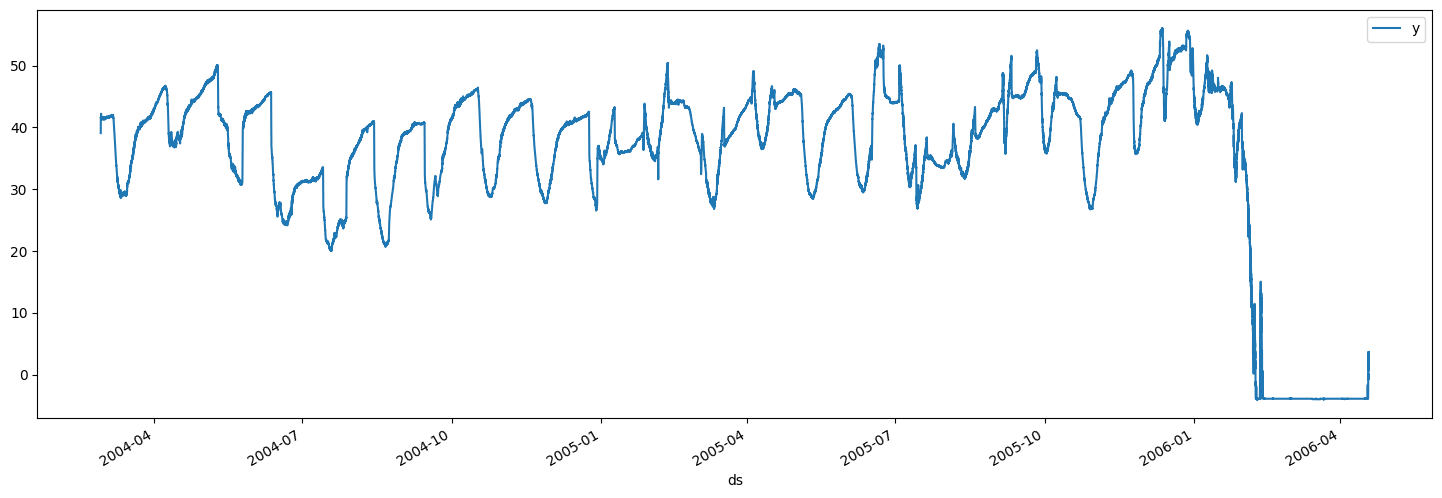

In [86]:
df_humidity_node31.plot(x='ds',y='y',figsize=(18,6))

In [93]:
# Splitting the dataset into train and test, taking first 80% as training data
train_humidity_node31 = df_humidity_node31.iloc[:len(df_humidity_node31)-1314]
# Taking the last 20% as testing data
test_humidity_node31 = df_humidity_node31.iloc[len(df_humidity_node31)-1314:]

In [103]:
mhumidity31 = Prophet()
mhumidity31.fit(train_humidity_node31)
futurehumidity31 = mhumidity31.make_future_dataframe(periods=1314, freq='H') #MS for monthly, H for hourly
forecasthumidity31 = mhumidity31.predict(futurehumidity31)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjep5tykl/ok36hrul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjep5tykl/cmllofpk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94372', 'data', 'file=/tmp/tmpjep5tykl/ok36hrul.json', 'init=/tmp/tmpjep5tykl/cmllofpk.json', 'output', 'file=/tmp/tmpjep5tykl/prophet_modelny1w4392/prophet_model-20231121033131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:31:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:35:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [104]:
forecasthumidity31.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-02-28 01:02:15,85.404891,31.356657,44.122658,85.404891,85.404891,-47.839105,-47.839105,-47.839105,0.021185,...,0.253141,0.253141,0.253141,-48.113431,-48.113431,-48.113431,0.0,0.0,0.0,37.565786
1,2004-02-28 01:12:45,85.403842,31.390719,43.850094,85.403842,85.403842,-47.832928,-47.832928,-47.832928,0.026068,...,0.253357,0.253357,0.253357,-48.112353,-48.112353,-48.112353,0.0,0.0,0.0,37.570914
2,2004-02-28 01:17:15,85.403392,31.046077,43.244314,85.403392,85.403392,-47.830549,-47.830549,-47.830549,0.027904,...,0.253437,0.253437,0.253437,-48.111890,-48.111890,-48.111890,0.0,0.0,0.0,37.572844
3,2004-02-28 01:21:15,85.402993,31.276270,44.595348,85.402993,85.402993,-47.828579,-47.828579,-47.828579,0.029397,...,0.253502,0.253502,0.253502,-48.111478,-48.111478,-48.111478,0.0,0.0,0.0,37.574414
4,2004-02-28 01:30:45,85.402043,31.604846,44.088877,85.402043,85.402043,-47.824474,-47.824474,-47.824474,0.032391,...,0.253633,0.253633,0.253633,-48.110498,-48.110498,-48.110498,0.0,0.0,0.0,37.577569


In [105]:
forecasthumidity31[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
65684,2006-06-02 17:09:45,21.218222,-2.516478,43.505512
65685,2006-06-02 18:09:45,21.263132,-4.289996,42.693254
65686,2006-06-02 19:09:45,21.311526,-2.636809,42.869840
65687,2006-06-02 20:09:45,21.345912,-3.370180,43.915832
65688,2006-06-02 21:09:45,21.366030,-1.801038,43.556822


In [106]:
plot_plotly(mhumidity31 ,forecasthumidity31)

Output hidden; open in https://colab.research.google.com to view.

In [107]:
plot_components_plotly(mhumidity31, forecasthumidity31)

Output hidden; open in https://colab.research.google.com to view.

In [99]:
predictions = forecasthumidity31.iloc[-1314:]['yhat']

In [100]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test_humidity_node31['y']))
print("Mean Value of Test Dataset:", test_humidity_node31['y'].mean())

Root Mean Squared Error between actual and  predicted values:  13.010593093569243
Mean Value of Test Dataset: -3.682447542009133


In [81]:
df_for_node31 = df_for_node31.loc[:, ['time', 'temperature']].copy()
df_for_node31.rename(columns={"time": "ds", "temperature": "y"}, inplace=True)
df_for_node31

KeyError: ignored

<Axes: xlabel='ds'>

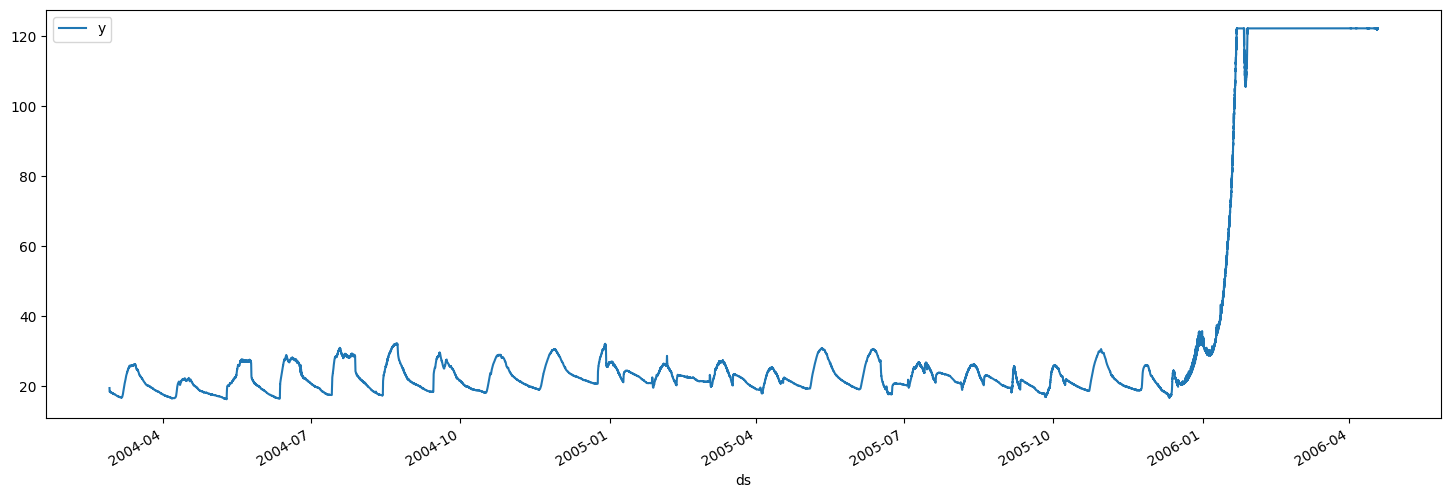

In [41]:
df_for_node31.plot(x='ds',y='y',figsize=(18,6))

In [43]:
new_df_for_node31 = df_for_node31.loc[:, ['time', 'temperature']].copy()
new_df_for_node31.rename(columns={"time": "ds", "temperature": "y"}, inplace=True)
new_df_for_node31

,ds,y
0,2004-02-28 01:02:15,19.5572
1,2004-02-28 01:12:45,19.2632
2,2004-02-28 01:17:15,19.0280
3,2004-02-28 01:21:15,18.9496
4,2004-02-28 01:30:45,18.8320
...,...,...
65689,2006-04-18 14:39:45,122.1530
65690,2006-04-18 14:50:45,122.1530
65691,2006-04-18 14:58:45,122.1530
65692,2006-04-18 15:05:45,122.0360


In [46]:
# Splitting the dataset into train and test, taking first 80% as training data
train_node31 = new_df_for_node31.iloc[:len(new_df_for_node31)-1314]
# Taking the last 20% as testing data
test_node31 = new_df_for_node31.iloc[len(new_df_for_node31)-1314:]

In [44]:
len(new_df_for_node31)

65694

In [48]:
m31 = Prophet()
m31.fit(train_node31)
future31 = m31.make_future_dataframe(periods=1314, freq='H') #MS for monthly, H for hourly
forecast31 = m31.predict(future31)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjep5tykl/szx6aq8n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjep5tykl/7d16k4y3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69124', 'data', 'file=/tmp/tmpjep5tykl/szx6aq8n.json', 'init=/tmp/tmpjep5tykl/7d16k4y3.json', 'output', 'file=/tmp/tmpjep5tykl/prophet_modelq104gsz1/prophet_model-20231121013818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:38:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:40:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [50]:
forecast31.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-02-28 01:02:15,-51.471487,12.847378,23.953861,-51.471487,-51.471487,69.732302,69.732302,69.732302,0.031264,...,-0.104284,-0.104284,-0.104284,69.805322,69.805322,69.805322,0.0,0.0,0.0,18.260814
1,2004-02-28 01:12:45,-51.466003,13.242023,23.838901,-51.466003,-51.466003,69.731924,69.731924,69.731924,0.030647,...,-0.101383,-0.101383,-0.101383,69.802660,69.802660,69.802660,0.0,0.0,0.0,18.265921
2,2004-02-28 01:17:15,-51.463653,12.883994,23.686513,-51.463653,-51.463653,69.731891,69.731891,69.731891,0.030507,...,-0.100135,-0.100135,-0.100135,69.801520,69.801520,69.801520,0.0,0.0,0.0,18.268238
3,2004-02-28 01:21:15,-51.461564,13.046940,23.873886,-51.461564,-51.461564,69.731931,69.731931,69.731931,0.030450,...,-0.099024,-0.099024,-0.099024,69.800506,69.800506,69.800506,0.0,0.0,0.0,18.270368
4,2004-02-28 01:30:45,-51.456602,12.847296,24.015088,-51.456602,-51.456602,69.732299,69.732299,69.732299,0.030578,...,-0.096377,-0.096377,-0.096377,69.798098,69.798098,69.798098,0.0,0.0,0.0,18.275697


In [51]:
forecast31[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
65684,2006-06-02 17:09:45,115.483135,87.015580,143.145321
65685,2006-06-02 18:09:45,115.452540,88.874452,144.255729
65686,2006-06-02 19:09:45,115.418353,87.590979,144.322114
65687,2006-06-02 20:09:45,115.410195,86.954862,143.024933
65688,2006-06-02 21:09:45,115.433814,87.950840,143.238874


In [53]:
plot_plotly(m31 ,forecast31)

Output hidden; open in https://colab.research.google.com to view.

In [54]:
plot_components_plotly(m31, forecast31)


Output hidden; open in https://colab.research.google.com to view.

In [59]:
predictions = forecast31.iloc[-1314:]['yhat']

In [60]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test_node31['y']))
print("Mean Value of Test Dataset:", test_node31['y'].mean())

Root Mean Squared Error between actual and  predicted values:  2.642415047946654
Mean Value of Test Dataset: 122.15023592085237


In [39]:
new_df = df.loc[:, ['time', 'temperature']].copy()
new_df.rename(columns={"time": "ds", "temperature": "y"}, inplace=True)
new_df

,ds,y
0,2004-02-28 00:58:15,19.7336
1,2004-02-28 00:58:45,19.6160
2,2004-02-28 00:59:15,19.7728
3,2004-02-28 00:59:45,20.2040
4,2004-02-28 01:00:15,19.0476
...,...,...
2313676,2006-05-11 09:36:15,23.4968
2313677,2006-05-11 09:36:45,23.4968
2313678,2006-05-11 09:37:15,23.4772
2313679,2006-05-11 09:37:45,23.4968


<Axes: xlabel='ds'>

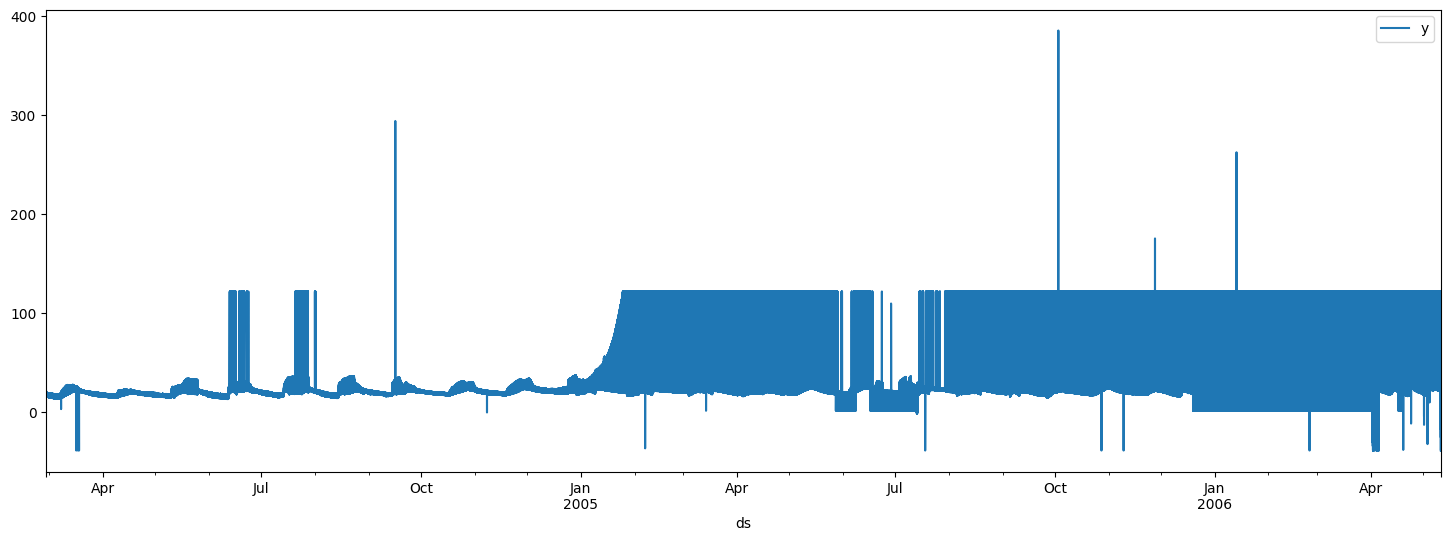

In [40]:
new_df.plot(x='ds',y='y',figsize=(18,6))

In [17]:
len(new_df)

2313681

In [22]:
# Select every 120th row starting from the first row
final_df = new_df.iloc[::120]
# Reset the index of the new DataFrame if needed
final_df.reset_index(drop=True, inplace=True)

In [97]:
final_df.head()
final_df.tail()

,ds,y
19276,2006-05-11 04:58:15,122.153000
19277,2006-05-11 05:58:15,2.113200
19278,2006-05-11 06:58:15,-38.400000
19279,2006-05-11 07:58:15,39.471541
19280,2006-05-11 08:58:15,24.829600


In [105]:
nan_count = final_df.isna().sum()
nan_count

ds    0
y     0
dtype: int64

In [106]:
# Calculate the mean of the column (excluding NaN values)
mean_value = final_df['y'].mean()

# Replace NaN values in the column with the mean
final_df['y'].fillna(mean_value, inplace=True)


In [107]:
nan_count = final_df.isna().sum()
nan_count

ds    0
y     0
dtype: int64

In [90]:
final_df.head()
final_df.tail()

,ds,y
19276,2006-05-11 04:58:15,122.153000
19277,2006-05-11 05:58:15,2.113200
19278,2006-05-11 06:58:15,-38.400000
19279,2006-05-11 07:58:15,39.471541
19280,2006-05-11 08:58:15,24.829600


<Axes: xlabel='ds'>

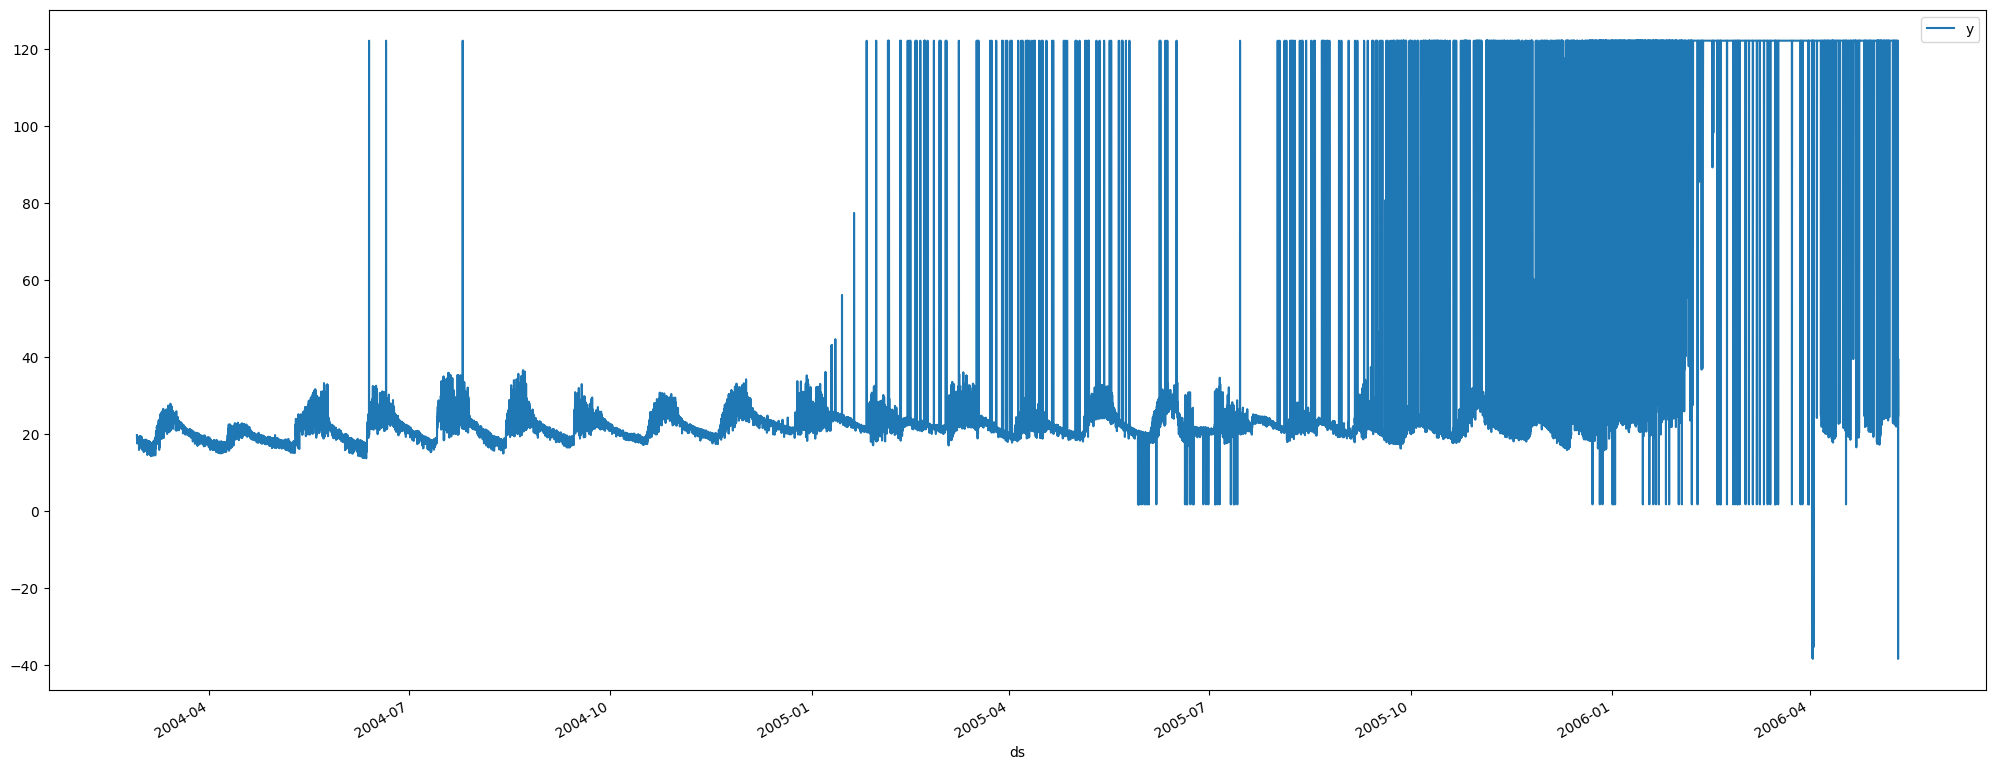

In [40]:
final_df.plot(x='ds',y='y',figsize=(25,10))

In [47]:
# Splitting the dataset into train and test, taking first 80% as training data
train = final_df.iloc[:len(final_df)-3856]
# Taking the last 20% as testing data
test = final_df.iloc[len(final_df)-3856:]

In [48]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=3856, freq='H') #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmkijrh6x/_hy7_uu7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmkijrh6x/2kbv_d13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43358', 'data', 'file=/tmp/tmpmkijrh6x/_hy7_uu7.json', 'init=/tmp/tmpmkijrh6x/2kbv_d13.json', 'output', 'file=/tmp/tmpmkijrh6x/prophet_model1xmpkq3z/prophet_model-20231120040016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:00:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:00:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-02-28 00:58:15,19.300663,0.573495,37.495805,19.300663,19.300663,-0.414068,-0.414068,-0.414068,-0.467428,-0.467428,-0.467428,0.053359,0.053359,0.053359,0.0,0.0,0.0,18.886594
1,2004-02-28 01:58:15,19.301363,0.605526,37.996291,19.301363,19.301363,-0.212531,-0.212531,-0.212531,-0.225024,-0.225024,-0.225024,0.012493,0.012493,0.012493,0.0,0.0,0.0,19.088832
2,2004-02-28 02:58:15,19.302063,1.586049,36.673891,19.302063,19.302063,0.045917,0.045917,0.045917,0.075614,0.075614,0.075614,-0.029696,-0.029696,-0.029696,0.0,0.0,0.0,19.347981
3,2004-02-28 03:58:15,19.302764,0.810292,37.531604,19.302764,19.302764,0.033346,0.033346,0.033346,0.106105,0.106105,0.106105,-0.072759,-0.072759,-0.072759,0.0,0.0,0.0,19.336109
4,2004-02-28 04:58:15,19.303464,-0.694742,37.993307,19.303464,19.303464,-0.295699,-0.295699,-0.295699,-0.179463,-0.179463,-0.179463,-0.116236,-0.116236,-0.116236,0.0,0.0,0.0,19.007765


In [52]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
19276,2006-05-11 04:58:15,56.071318,37.967922,73.981441
19277,2006-05-11 05:58:15,55.724495,36.606858,74.557372
19278,2006-05-11 06:58:15,55.626248,38.756565,74.206316
19279,2006-05-11 07:58:15,55.848211,36.634183,73.224674
19280,2006-05-11 08:58:15,56.191668,37.979822,74.620308


In [36]:
test.tail()

,ds,y


In [53]:
plot_plotly(m ,forecast)


Output hidden; open in https://colab.research.google.com to view.

In [54]:
plot_components_plotly(m, forecast)


Output hidden; open in https://colab.research.google.com to view.

In [57]:
predictions = forecast.iloc[-3856:]['yhat']

In [59]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())


Root Mean Squared Error between actual and  predicted values:  64.85744549129558
Mean Value of Test Dataset: 100.20078117417202


In [13]:
# Replace 'your_file.csv' with your actual file name and adjust 'delimiter' accordingly
df = pd.read_csv('labapp3-data-new.txt', delimiter=' ', na_values=['NaN', 'NAN', 'na', 'N/A'])
df.head()
# 0 NaN NaN NaN NaN NaN

,time,nodeid,temperature,humidity,light,voltage
0,30,19.0,19.7336,37.0933,71.76,2.69964
1,30,25.0,19.6160,37.5737,97.52,2.69964
2,30,24.0,19.7728,37.1620,143.52,2.71196
3,30,3.0,20.2040,36.8871,50.6,2.69964
4,30,28.0,19.0476,40.0945,NaN,2.80151


In [14]:
# Assuming 'df' is your original DataFrame containing the data

# Get unique node IDs from the 'nodeid' column
unique_nodes = df['nodeid'].unique()

# Create a dictionary of DataFrames for each node ID
node_dataframes = {}
for node_id in unique_nodes:
    node_dataframes[node_id] = df[df['nodeid'] == node_id].copy()

# Create a list of tuples sorted by keys
sorted_items = sorted(node_dataframes.items(), key=lambda x: x[0])
# Now node_dataframes is a dictionary where each key represents a node ID,
# and the corresponding value is a DataFrame containing data for that node ID.
# Create a new dictionary from the sorted list of tuples
sorted_node_dataframes = {k: v for k, v in sorted_items}

for node_id, node_df in sorted_node_dataframes.items():
    sorted_node_dataframes[node_id].reset_index(drop=True, inplace=True)
    # Assuming 'df' is your DataFrame
    non_null_counts = sorted_node_dataframes[node_id].count()
    # print(non_null_counts)
    # print(sorted_node_dataframes[node_id])

time           43047
nodeid         43047
temperature    43047
humidity       43047
light          43047
voltage        43047
dtype: int64
          time  nodeid  temperature   humidity  light  voltage
0           60     1.0      19.9884  37.093300  45.08  2.69964
1          300     1.0      19.3024  38.462900  45.08  2.68742
2          480     1.0      19.1652  38.803900  45.08  2.68742
3          510     1.0      19.1750  38.837900  45.08  2.69964
4          630     1.0      19.1456  38.940100  45.08  2.68742
...        ...     ...          ...        ...    ...      ...
43042  2777800     1.0     121.9770  -0.457683    9.2  2.01329
43043  2778030     1.0     121.9180   4.774480    9.2  2.01329
43044  2778690     1.0     122.1530   8.673280    9.2  2.00649
43045  2778720     1.0     121.5260   7.198330    9.2  2.00649
43046  2779290     1.0     121.9970  14.946100   8.28  2.00649

[43047 rows x 6 columns]
time           46915
nodeid         46915
temperature    46915
humidity       4

In [17]:
df_for_node_31 = sorted_node_dataframes[31]
df_for_node_31.head()

,time,nodeid,temperature,humidity,light,voltage
0,30,31.0,19.5572,39.0763,150.88,2.69964
1,90,31.0,19.2632,39.7217,143.52,2.69964
2,150,31.0,19.0280,40.4328,150.88,2.69964
3,180,31.0,18.9496,40.3652,150.88,2.69964
4,240,31.0,18.8320,40.7368,150.88,2.69964
